# Hydrate Formation Temperature  7/19/2024

In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load and prepare the dataset


In [6]:
df = pd.read_excel(r'E:\Master Project\Hydrate Formation Temperature 9 6 2024\Hydrate Formation Temperature 9 6 2024.xlsx')  
df.columns = ['Pressure, psi', 'Gas density, g/cc', 'Temperature, F']

# 2. Split the dataset


In [7]:
X = df[['Pressure, psi', 'Gas density, g/cc']]
y = df['Temperature, F']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 60% train, 20% CV

# 3. Define and train the regression models


In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR":SVR()
}

# Train each model and evaluate


In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Regressor": SVR(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# List to store performance metrics
performance_list = []

# Train the models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    predictions[name] = (y_pred_train, y_pred_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

    performance_list.append({
        'Model': name,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse
    })

   
# Convert the list to a DataFrame
performance_metrics = pd.DataFrame(performance_list)

# Display the DataFrame with performance metrics
performance_metrics.head()

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE
0,Linear Regression,0.708354,0.718601,7.007786,6.995307
1,Decision Tree,1.000000,0.999779,0.000000,0.195866
2,Support Vector Regressor,0.912108,0.921780,3.847057,3.688103
3,Random Forest,0.999984,0.999906,0.051370,0.127731
4,Gradient Boosting,0.999562,0.999185,0.271567,0.376522


# Plot the evaluations


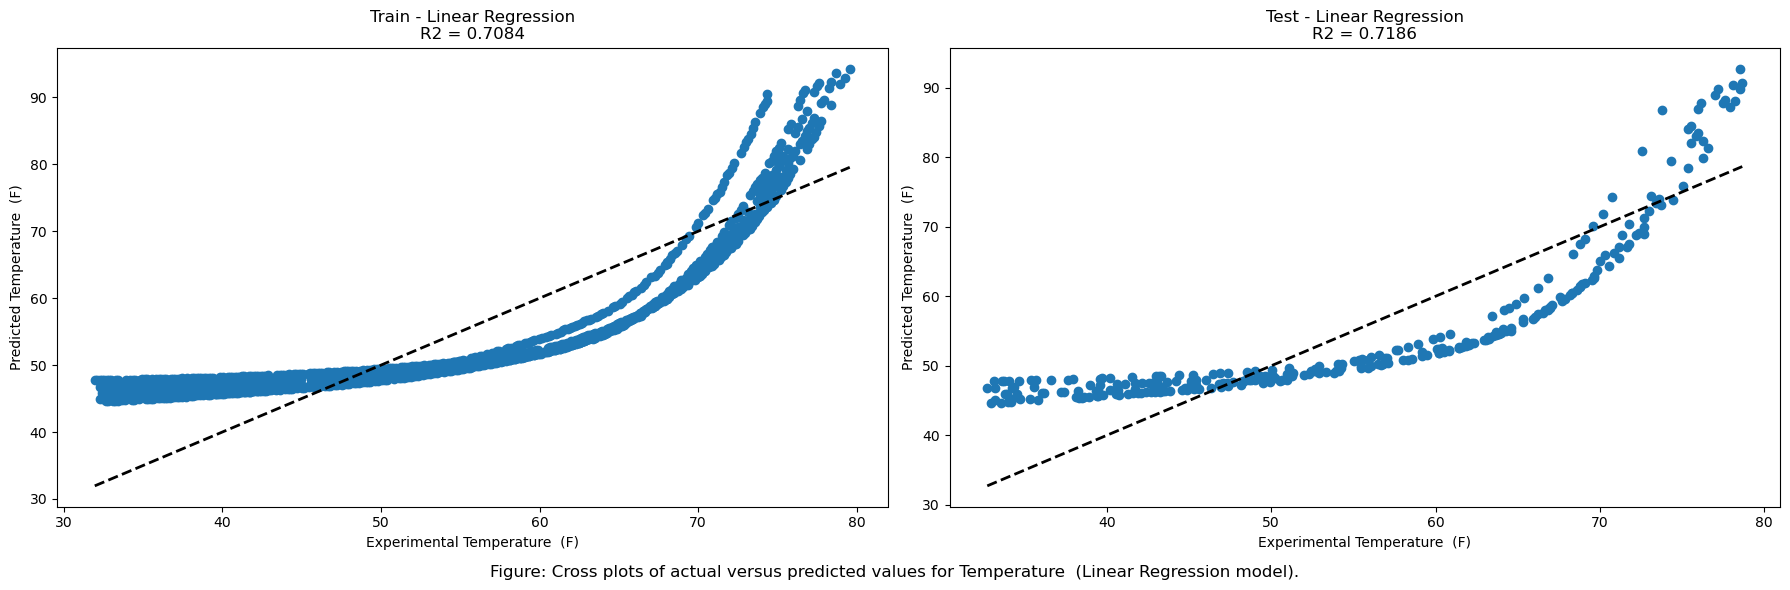

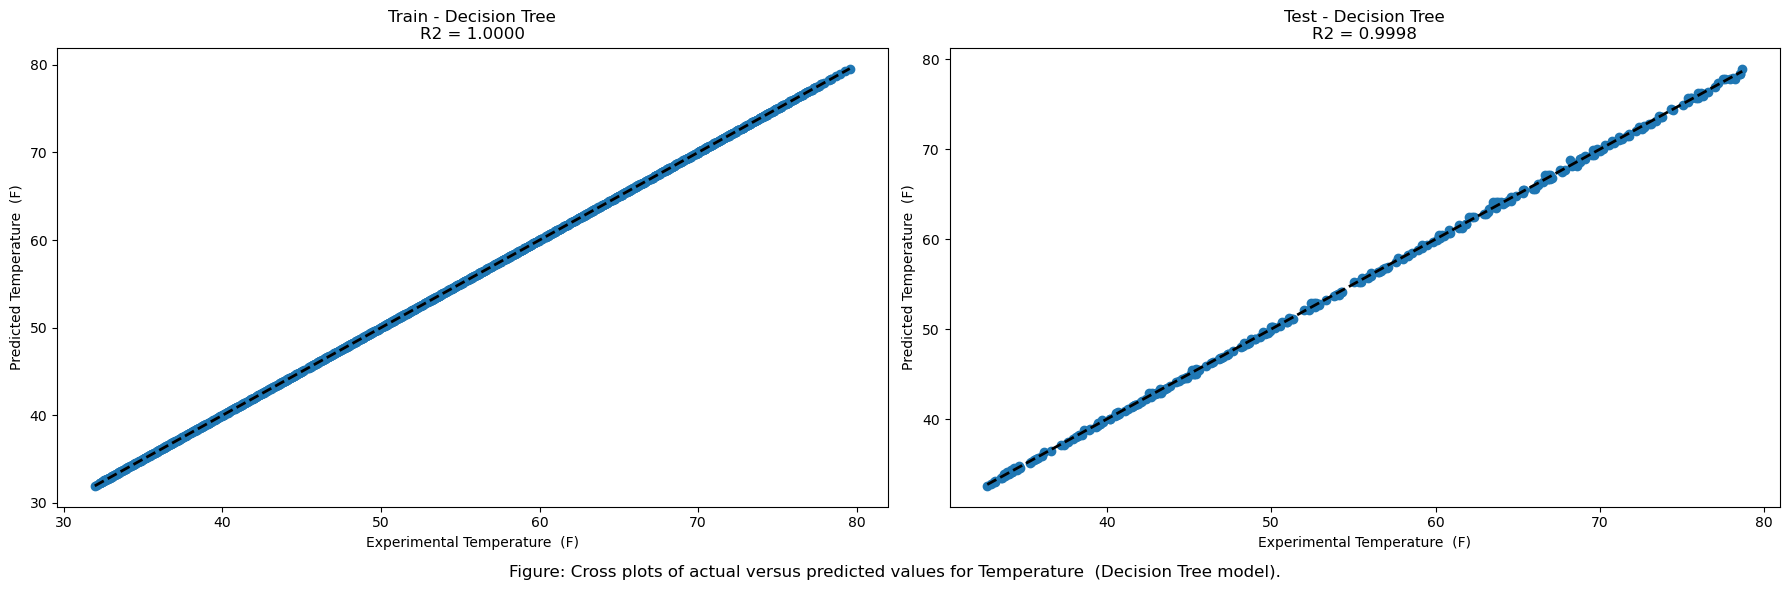

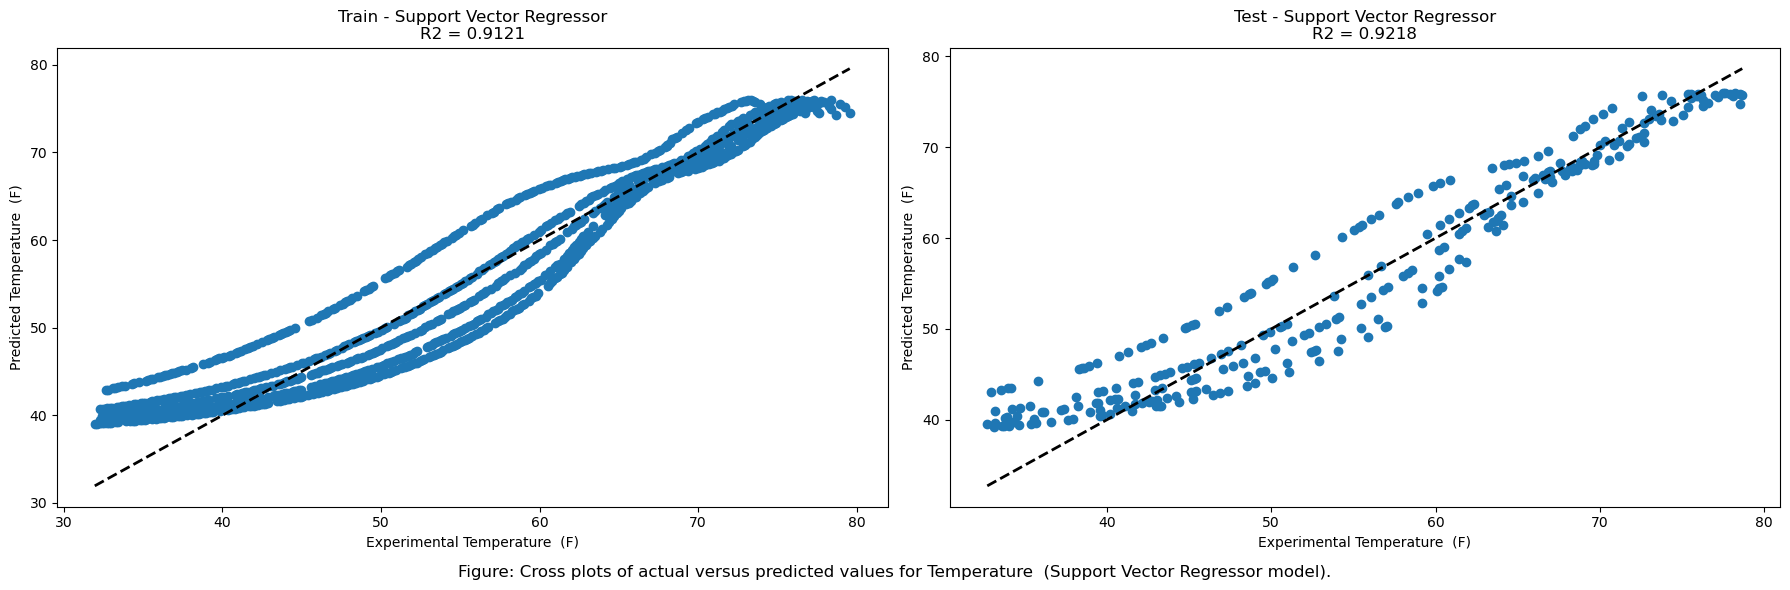

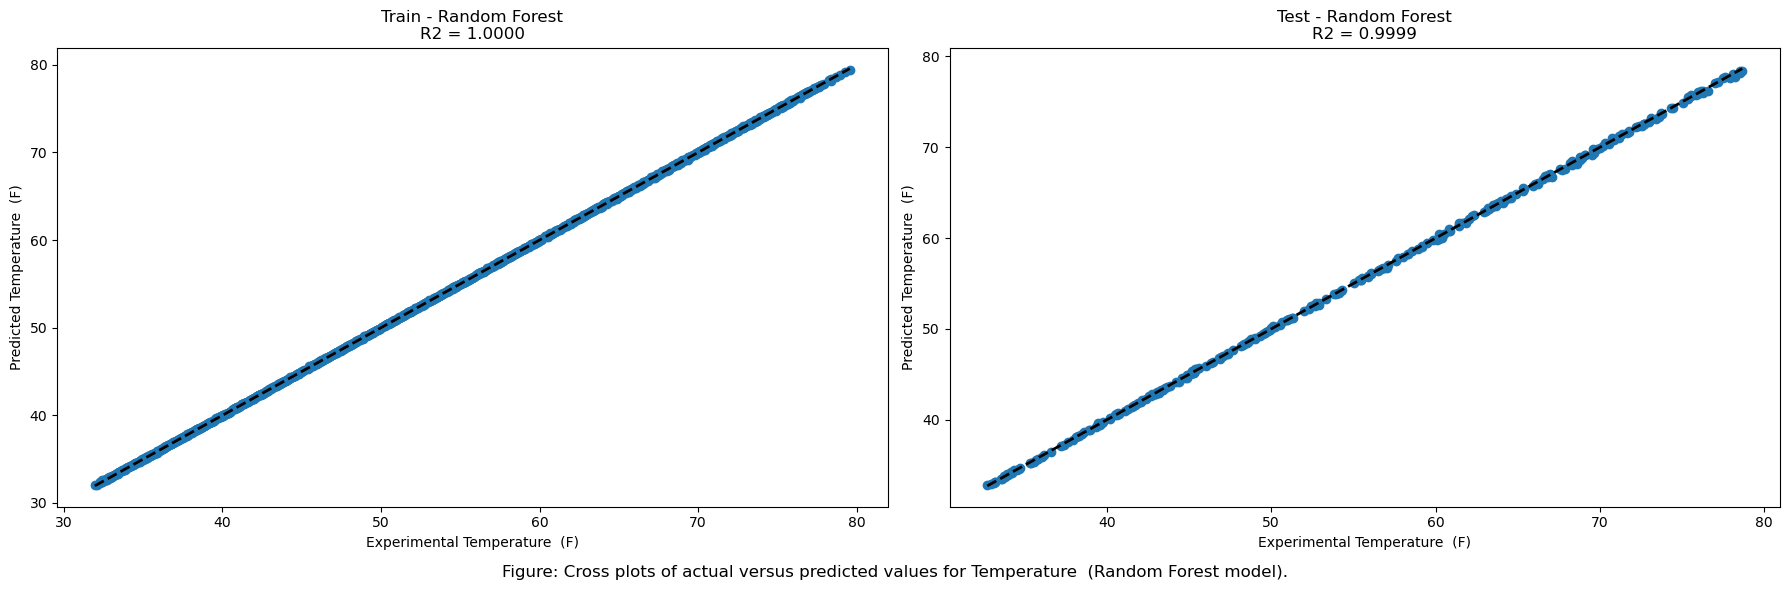

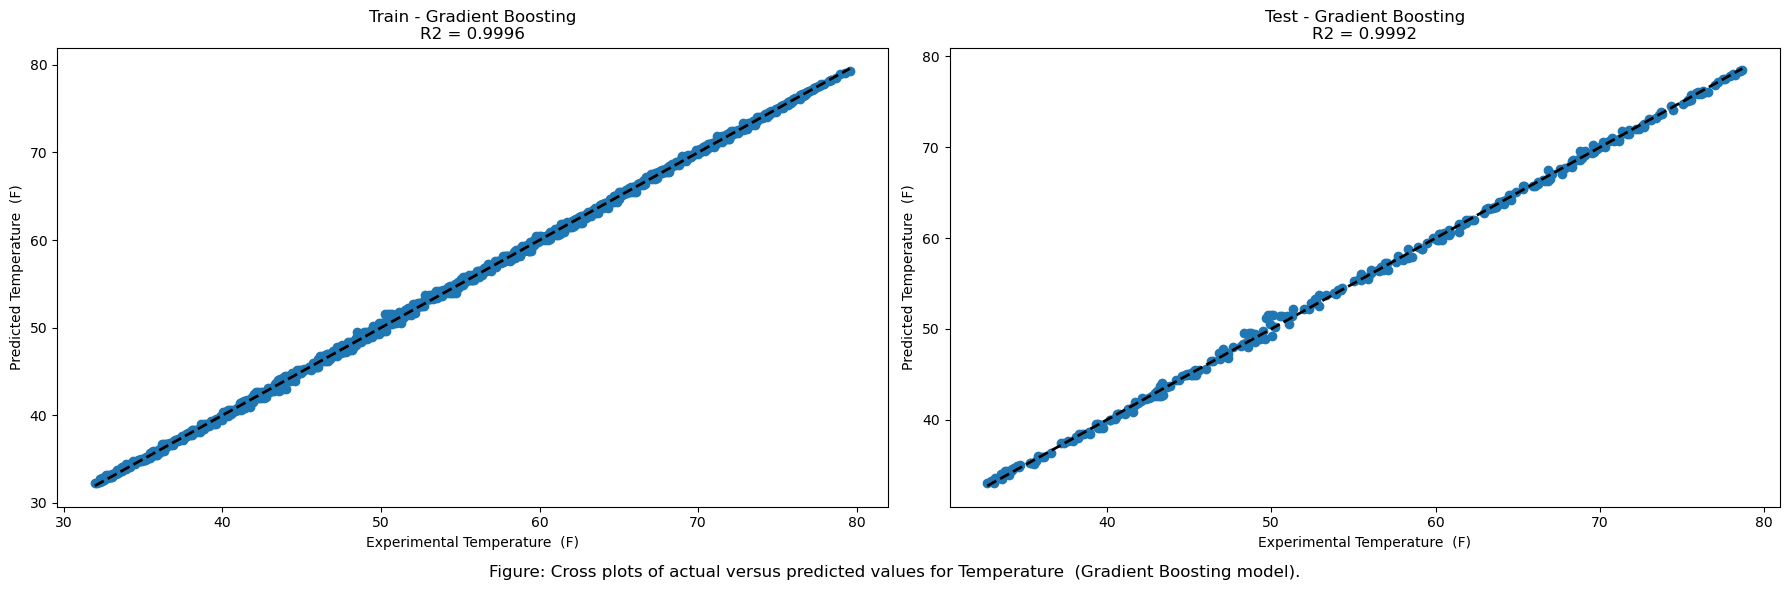

In [9]:
# Train the models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    predictions[name] = (y_pred_train, y_pred_test)

    # Create a figure and axis for each model
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    datasets = [
        (y_train, y_pred_train, 'Train'),
        (y_test, y_pred_test, 'Test'),
    ]

    for i, (y_true, y_pred, data_type) in enumerate(datasets):
        # Calculate R^2
        r2 = r2_score(y_true, y_pred)

        # Plot actual versus predicted values
        ax[i].scatter(y_true, y_pred)
        ax[i].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)  # Ideal 45-degree line
        ax[i].set_xlabel('Experimental Temperature  (F)')
        ax[i].set_ylabel('Predicted Temperature  (F)')
        ax[i].set_title(f'{data_type} - {name}\nR2 = {r2:.4f}')

    plt.suptitle(f'Figure: Cross plots of actual versus predicted values for Temperature  ({name} model).', y=0)
    plt.tight_layout()
    plt.show()

# Select the best model based highest R^2


### Example prediction

In [259]:
new_data = pd.DataFrame({'Pressure, psi': [70, 100], 'Gas density, g/cc': [0.8, 0.9]})
new_data

,"Pressure, psi","Gas density, g/cc"
0,70,0.8
1,100,0.9


In [261]:
best_model_name = df_transposed['R^2'].idxmax()  # Assuming highest R^2 is best
best_model = models[best_model_name]

# Predict using the best model
predicted_temperature = best_model.predict(new_data)

print(f"Best model: {best_model_name}")
print(f"Predicted Temperature for new data: {predicted_temperature}")

Best model: Random Forest
Predicted Temperature for new data: [32.646598 39.157556]


# Visualize The Data

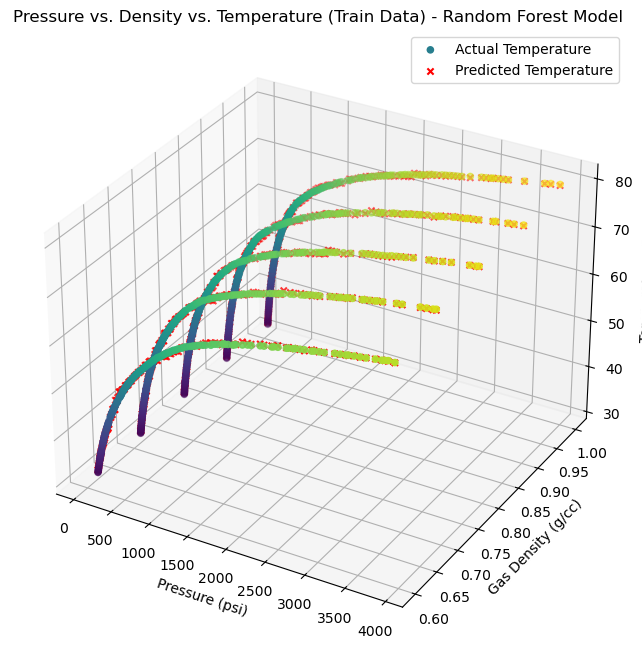

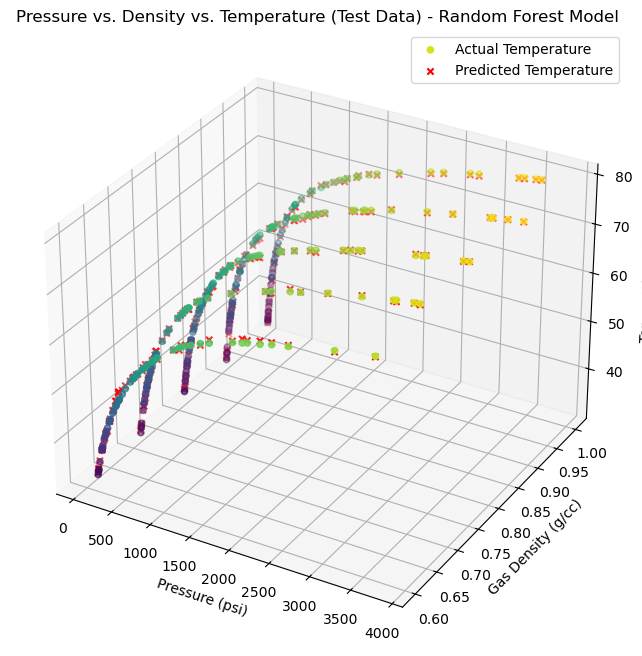

In [264]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# رسم النقاط للقيم الفعلية
ax.scatter(X_train['Pressure, psi'], X_train['Gas density, g/cc'], y_train, c=y_train, cmap='viridis', label='Actual Temperature')

# رسم النقاط للقيم المتوقعة (بنفس قيم الضغط والكثافة) مع تغيير الشكل إلى x
ax.scatter(X_train['Pressure, psi'], X_train['Gas density, g/cc'], y_pred_train, c='red', marker='x', label='Predicted Temperature')

ax.set_xlabel('Pressure (psi)')
ax.set_ylabel('Gas Density (g/cc)')
ax.set_zlabel('Temperature (F)')
plt.title(f'Pressure vs. Density vs. Temperature (Train Data) - {best_model_name} Model')
ax.legend()
plt.show()

#  الرسمة لبيانات الاختبار (بنفس الطريقة)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# رسم النقاط للقيم الفعلية
ax.scatter(X_test['Pressure, psi'], X_test['Gas density, g/cc'], y_test, c=y_test, cmap='viridis', label='Actual Temperature')

# رسم النقاط للقيم المتوقعة (بنفس قيم الضغط والكثافة) مع تغيير الشكل إلى x
ax.scatter(X_test['Pressure, psi'], X_test['Gas density, g/cc'], y_pred_test, c='red', marker='x', label='Predicted Temperature')

ax.set_xlabel('Pressure (psi)')
ax.set_ylabel('Gas Density (g/cc)')
ax.set_zlabel('Temperature (F)')
plt.title(f'Pressure vs. Density vs. Temperature (Test Data) - {best_model_name} Model')
ax.legend()
plt.show()